In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
dataset = pd.read_csv('H-1B_Disclosure_Data_FY2019.csv')

C:\ananconda\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (4,13,14,20,22,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,57,58,59,61,64,66,67,68,69,70,71,72,73,76,78,79,80,82,85,87,88,89,90,91,92,93,94,97,98,99,100,101,103,106,108,109,110,111,112,113,114,115,121,122,124,127,129,130,131,132,133,134,135,136,142,143,145,148,150,151,152,153,154,155,156,157,160,162,163,164,166,169,171,172,173,174,175,176,177,178,184,185,187,190,192,193,194,195,196,197,198,199,205,206,208,211,213,214,215,216,217,218,219,220,223,225,226,227,229,232,234,235,236,237,238,239,240,244,246,247,248,250,253,257,258,259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
dataset.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,2016-04-08 00:00:00,2019-04-30 00:00:00,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,2017-07-14 00:00:00,2019-05-13 00:00:00,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,2017-08-23 00:00:00,2019-04-30 00:00:00,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,2017-12-22 00:00:00,2019-08-20 00:00:00,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,2018-01-10 00:00:00,2019-04-15 00:00:00,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(664616, 260)

# Selecting the features which will contribute prominently to the model building


In [5]:
dataset = dataset[['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']]

# selecting only those data points for which the visa type is H1 - B

In [6]:
dataset.CASE_STATUS.unique()

array(['WITHDRAWN', 'CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [7]:
dataset = dataset[((dataset['CASE_STATUS'].str.upper() == 'CERTIFIED') | \
                               (dataset['CASE_STATUS'].str.upper() == 'DENIED')) & \
                              (dataset['VISA_CLASS'].str.upper() == 'H-1B')] 

In [8]:
dataset.CASE_STATUS.unique()

array(['CERTIFIED', 'DENIED'], dtype=object)

# EDA

<AxesSubplot:>

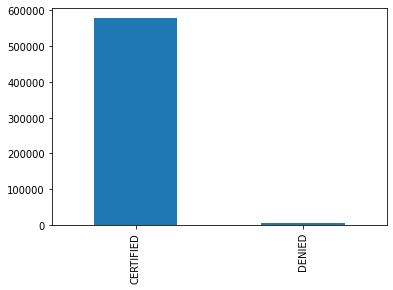

In [9]:
dataset.CASE_STATUS.value_counts().plot(kind = 'bar')


In [10]:
emp_name = dataset['EMPLOYER_NAME'].value_counts()
emp_name.to_frame()

,EMPLOYER_NAME
COGNIZANT TECHNOLOGY SOLUTIONS US CORP,28106
INFOSYS LIMITED,21402
TATA CONSULTANCY SERVICES LIMITED,11839
GOOGLE LLC,9093
ERNST & YOUNG U.S. LLP,8661
...,...
"PYRAMID CONSULTING GROUP, INC.",1
HEALTH CARE LOGISTICS INC.,1
INTELLISPAR LLC,1
ELAN RGV WIRELESS LLC,1


<AxesSubplot:xlabel='EMPLOYER_NAME'>

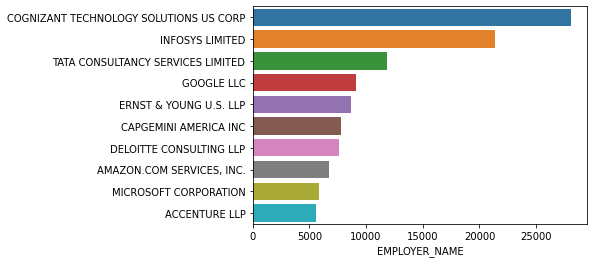

In [11]:
dataset['EMPLOYER_NAME'].value_counts()
sns.barplot(x = dataset['EMPLOYER_NAME'].value_counts()[:10], y = dataset['EMPLOYER_NAME'].value_counts().index[:10])

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WILLFUL_VIOLATOR', ylabel='count'>

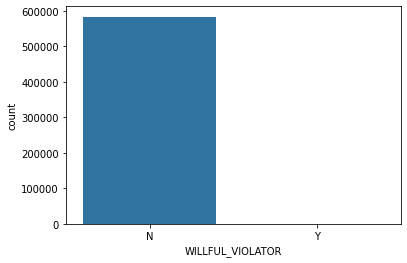

In [12]:
sns.countplot(dataset.WILLFUL_VIOLATOR)

In [13]:
dataset.AGENT_REPRESENTING_EMPLOYER.unique()

array(['Y', 'N', nan], dtype=object)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGENT_REPRESENTING_EMPLOYER', ylabel='count'>

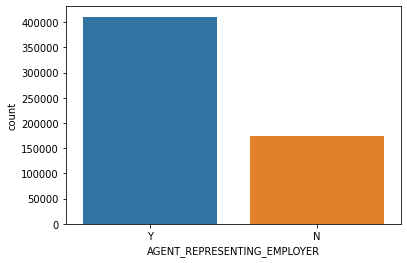

In [14]:
sns.countplot(dataset.AGENT_REPRESENTING_EMPLOYER)

In [15]:
dataset.JOB_TITLE.unique()

array(['ADVERSTING AND PROMOTIONS MANAGER',
       'ADVERTISING AND PROMOTIONS DIRECTOR', 'PROGRAM MANAGER I', ...,
       'INSPECTOR V', 'CONTAINER MOBILE HARBOR CRANE OPERATOR',
       'DIGITAL TOUCHPOINTS ANALYST'], dtype=object)

In [16]:
dataset.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,NaN,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,...,0.0,0,0,N,NaN,N,33.0,Hour,1.0,NaN
26,CERTIFIED,H-1B,TPUSA-FHCS,Y,NaN,ADVERTISING AND PROMOTIONS DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,56142.0,0,...,0.0,1,0,N,NaN,N,99000.0,Year,1.0,NaN
47,CERTIFIED,H-1B,UNIVERSITY OF TEXAS AT DALLAS,N,NaN,PROGRAM MANAGER I,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,611310.0,0,...,0.0,0,0,N,NaN,N,67500.0,Year,1.0,55370.0
52,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,NaN,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0.0,0,0,N,NaN,N,102000.0,Year,1.0,94806.0
54,CERTIFIED,H-1B,APPLE INC.,Y,NaN,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,...,0.0,0,0,N,NaN,N,97781.0,Year,50.0,97781.0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583806 entries, 24 to 664615
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583806 non-null  object 
 1   VISA_CLASS                   583806 non-null  object 
 2   EMPLOYER_NAME                583802 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  583801 non-null  object 
 4   SECONDARY_ENTITY_1           534045 non-null  object 
 5   JOB_TITLE                    583806 non-null  object 
 6   SOC_TITLE                    583802 non-null  object 
 7   SOC_CODE                     583802 non-null  object 
 8   NAICS_CODE                   583805 non-null  float64
 9   CONTINUED_EMPLOYMENT         583806 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   583806 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    583805 non-null  float64
 12  CHANGE_EMPLOYER              583806 non-null  int64  
 13

In [18]:
dataset['H-1B_DEPENDENT'].head()

24    N
26    N
47    N
52    N
54    N
Name: H-1B_DEPENDENT, dtype: object

In [19]:
dataset['H-1B_DEPENDENT'].unique()

array(['N', 'Y', nan], dtype=object)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='H-1B_DEPENDENT', ylabel='count'>

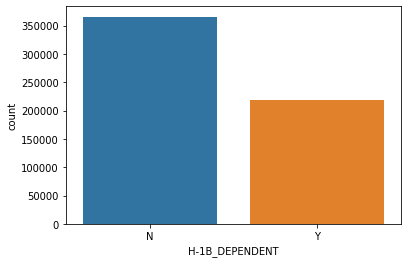

In [20]:
sns.countplot(dataset['H-1B_DEPENDENT'])

In [21]:
ammendedPetition = dataset.AMENDED_PETITION
ammendedPetition.to_frame()

,AMENDED_PETITION
24,0
26,0
47,0
52,0
54,0
...,...
664611,0
664612,0
664613,0
664614,0


In [22]:
dataset.CHANGE_EMPLOYER.head(30)

24     0
26     1
47     0
52     0
54     0
55     0
56     0
57     0
72     0
73     1
75     1
79     0
84     0
87     1
88     0
90     1
93     1
94     0
96     1
97     0
106    0
107    0
111    0
120    0
121    0
122    0
128    0
130    0
131    0
132    0
Name: CHANGE_EMPLOYER, dtype: int64

In [23]:
dataset.CHANGE_EMPLOYER.unique()

array([ 0,  1,  5,  2,  4, 10, 15,  3, 50, 30, 20,  6,  8, 25, 99,  7, 16,
       54, 40, 12,  9, 11], dtype=int64)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHANGE_EMPLOYER', ylabel='count'>

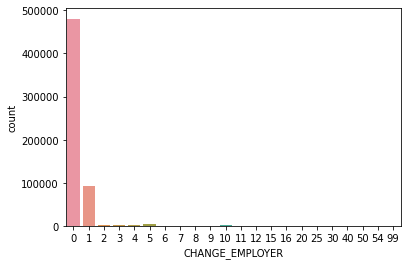

In [24]:
sns.countplot(dataset.CHANGE_EMPLOYER)

In [25]:
dataset['SECONDARY_ENTITY_1'].head(50)

24     NaN
26     NaN
47     NaN
52     NaN
54     NaN
55     NaN
56     NaN
57     NaN
72       N
73       N
75       N
79       N
84       N
87       N
88       N
90       N
93       N
94       N
96       N
97       N
106      N
107      N
111      N
120      N
121      N
122      N
128      N
130      N
131      N
132      N
133      N
136      N
139      N
140      N
141      N
142      N
143      N
144      N
146      N
147      N
148      N
149      N
150      N
151      N
152      N
153      N
154      N
155      N
156      N
157      N
Name: SECONDARY_ENTITY_1, dtype: object

In [26]:
dataset['SECONDARY_ENTITY_1'].unique()

array([nan, 'N', 'Y'], dtype=object)

In [27]:
dataset['SECONDARY_ENTITY_1'].value_counts()

N    321406
Y    212639
Name: SECONDARY_ENTITY_1, dtype: int64

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SECONDARY_ENTITY_1', ylabel='count'>

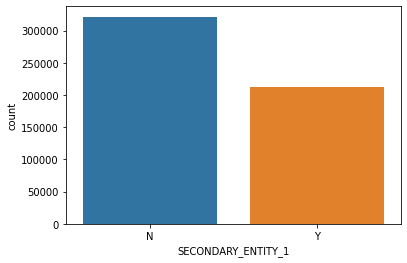

In [28]:
sns.countplot(dataset['SECONDARY_ENTITY_1'])

# Dealing with missing values

In [29]:
dataset.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       4
AGENT_REPRESENTING_EMPLOYER         5
SECONDARY_ENTITY_1              49761
JOB_TITLE                           0
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     20
SUPPORT_H1B                    365278
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4681
dtype: int64

In [30]:
dataset.SUPPORT_H1B.value_counts()

Y    216762
N      1766
Name: SUPPORT_H1B, dtype: int64

In [31]:
dataset.SUPPORT_H1B.describe()

count     218528
unique         2
top            Y
freq      216762
Name: SUPPORT_H1B, dtype: object

In [32]:
dataset.SUPPORT_H1B.fillna("Y",inplace = True)

In [33]:
dataset.isnull().sum()

CASE_STATUS                        0
VISA_CLASS                         0
EMPLOYER_NAME                      4
AGENT_REPRESENTING_EMPLOYER        5
SECONDARY_ENTITY_1             49761
JOB_TITLE                          0
SOC_TITLE                          4
SOC_CODE                           4
NAICS_CODE                         1
CONTINUED_EMPLOYMENT               0
CHANGE_PREVIOUS_EMPLOYMENT         0
NEW_CONCURRENT_EMPLOYMENT          1
CHANGE_EMPLOYER                    0
AMENDED_PETITION                   0
H-1B_DEPENDENT                    20
SUPPORT_H1B                        0
WILLFUL_VIOLATOR                  20
WAGE_RATE_OF_PAY_FROM_1            4
WAGE_UNIT_OF_PAY_1                 4
TOTAL_WORKER_POSITIONS             1
PREVAILING_WAGE_1               4681
dtype: int64

In [34]:
dataset['SECONDARY_ENTITY_1'].describe()

count     534045
unique         2
top            N
freq      321406
Name: SECONDARY_ENTITY_1, dtype: object

In [35]:
dataset['SECONDARY_ENTITY_1'].fillna("N",inplace = True)

In [36]:
dataset.isnull().sum()

CASE_STATUS                       0
VISA_CLASS                        0
EMPLOYER_NAME                     4
AGENT_REPRESENTING_EMPLOYER       5
SECONDARY_ENTITY_1                0
JOB_TITLE                         0
SOC_TITLE                         4
SOC_CODE                          4
NAICS_CODE                        1
CONTINUED_EMPLOYMENT              0
CHANGE_PREVIOUS_EMPLOYMENT        0
NEW_CONCURRENT_EMPLOYMENT         1
CHANGE_EMPLOYER                   0
AMENDED_PETITION                  0
H-1B_DEPENDENT                   20
SUPPORT_H1B                       0
WILLFUL_VIOLATOR                 20
WAGE_RATE_OF_PAY_FROM_1           4
WAGE_UNIT_OF_PAY_1                4
TOTAL_WORKER_POSITIONS            1
PREVAILING_WAGE_1              4681
dtype: int64

In [37]:
dataset.SUPPORT_H1B.describe()

count     583806
unique         2
top            Y
freq      582040
Name: SUPPORT_H1B, dtype: object

In [38]:
dataset.SUPPORT_H1B.unique()

array(['Y', 'N'], dtype=object)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SUPPORT_H1B', ylabel='count'>

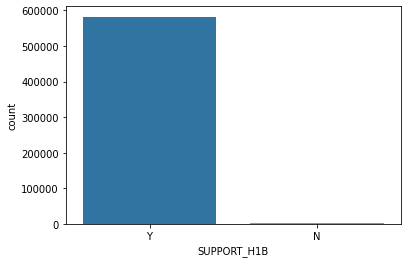

In [39]:
sns.countplot(dataset.SUPPORT_H1B)

In [40]:
dataset.SUPPORT_H1B.fillna("Y",inplace = True)

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_RATE_OF_PAY_FROM_1'>

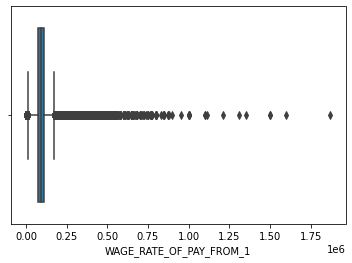

In [41]:
sns.boxplot(dataset['WAGE_RATE_OF_PAY_FROM_1'])

In [42]:
dataset['WAGE_RATE_OF_PAY_FROM_1'].describe()

count    5.838020e+05
mean     9.373977e+04
std      4.568385e+04
min      7.500000e+00
25%      7.381900e+04
50%      9.000000e+04
75%      1.133810e+05
max      1.870000e+06
Name: WAGE_RATE_OF_PAY_FROM_1, dtype: float64

In [43]:
dataset['WAGE_RATE_OF_PAY_FROM_1'].isnull().sum()

4

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WAGE_UNIT_OF_PAY_1', ylabel='count'>

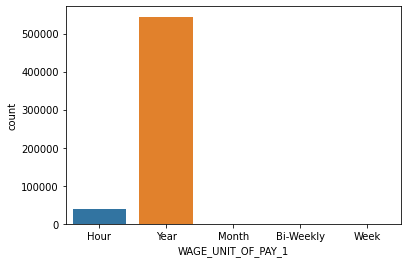

In [44]:
#sns.boxplot(dataset['WAGE_UNIT_OF_PAY_1'])
sns.countplot(dataset['WAGE_UNIT_OF_PAY_1'])

In [45]:
(dataset['WAGE_UNIT_OF_PAY_1'])

24        Hour
26        Year
47        Year
52        Year
54        Year
          ... 
664611    Year
664612    Year
664613    Year
664614    Year
664615    Year
Name: WAGE_UNIT_OF_PAY_1, Length: 583806, dtype: object

In [46]:
def convert(x):
  if x=='Y':
    return(0)
  else:
    return(1)

In [47]:
dataset['WAGE_UNIT_OF_PAY_1'] = dataset['WAGE_UNIT_OF_PAY_1'].apply(convert)

In [48]:
dataset['WAGE_UNIT_OF_PAY_1'].head(50)

24     1
26     1
47     1
52     1
54     1
55     1
56     1
57     1
72     1
73     1
75     1
79     1
84     1
87     1
88     1
90     1
93     1
94     1
96     1
97     1
106    1
107    1
111    1
120    1
121    1
122    1
128    1
130    1
131    1
132    1
133    1
136    1
139    1
140    1
141    1
142    1
143    1
144    1
146    1
147    1
148    1
149    1
150    1
151    1
152    1
153    1
154    1
155    1
156    1
157    1
Name: WAGE_UNIT_OF_PAY_1, dtype: int64

In [49]:
dataset['TOTAL_WORKER_POSITIONS'].value_counts()

1.0      547907
3.0        6504
2.0        5274
15.0       4970
10.0       4944
5.0        3724
6.0        1992
20.0       1839
25.0       1649
50.0       1323
4.0        1042
30.0       1016
12.0        215
24.0        204
8.0         183
60.0        172
7.0         149
100.0       144
75.0        106
40.0         91
9.0          49
45.0         32
150.0        24
16.0         24
11.0         24
14.0         23
13.0         19
35.0         18
32.0         16
34.0         15
200.0        15
17.0         14
18.0         13
36.0         11
22.0          8
19.0          8
99.0          6
175.0         6
28.0          4
23.0          4
80.0          3
594.0         2
500.0         2
90.0          2
300.0         2
70.0          2
110.0         1
31.0          1
21.0          1
26.0          1
43.0          1
78.0          1
37.0          1
54.0          1
76.0          1
65.0          1
47.0          1
Name: TOTAL_WORKER_POSITIONS, dtype: int64

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE_1'>

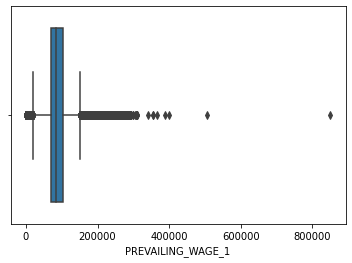

In [50]:
sns.boxplot(dataset['PREVAILING_WAGE_1'])

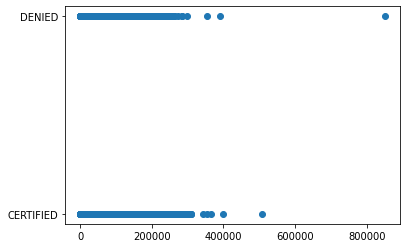

In [51]:
plt.scatter(dataset['PREVAILING_WAGE_1'], dataset['CASE_STATUS'])

<AxesSubplot:xlabel='CASE_STATUS'>

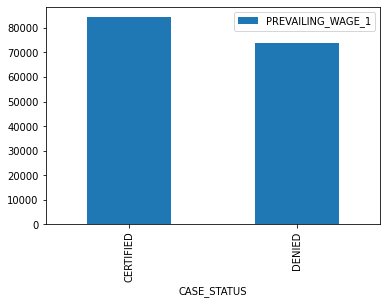

In [52]:
dataset.pivot_table('PREVAILING_WAGE_1','CASE_STATUS').plot.bar()

In [53]:
dataset['PREVAILING_WAGE_1'] = dataset['PREVAILING_WAGE_1'].clip(lower = dataset['PREVAILING_WAGE_1'].quantile(0.1), upper = dataset['PREVAILING_WAGE_1'].quantile(0.80))

C:\ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREVAILING_WAGE_1'>

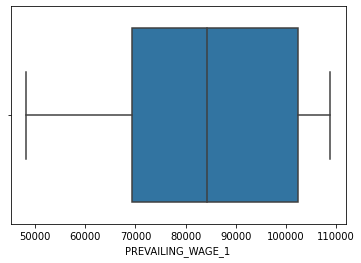

In [54]:
sns.boxplot(dataset['PREVAILING_WAGE_1'])

In [55]:
dataset['PREVAILING_WAGE_1'].count()

579125

In [56]:
dataset['PREVAILING_WAGE_1'].isnull().value_counts()

False    579125
True       4681
Name: PREVAILING_WAGE_1, dtype: int64

In [57]:
dataset['PREVAILING_WAGE_1'].describe()


count    579125.000000
mean      83337.328527
std       20064.877288
min       48131.000000
25%       69285.000000
50%       84240.000000
75%      102398.000000
max      108888.000000
Name: PREVAILING_WAGE_1, dtype: float64

In [58]:
dataset['PREVAILING_WAGE_1'] = dataset['PREVAILING_WAGE_1'].fillna(dataset['PREVAILING_WAGE_1'].mean())

In [59]:
dataset['PREVAILING_WAGE_1'].isnull().value_counts()

False    583806
Name: PREVAILING_WAGE_1, dtype: int64

# dropping the null values of EMPLOYER_NAME,                  AGENT_REPRESENTING_EMPLOYER, SOC_TITLE, SOC_CODE,                  NAICS_CODE 

In [60]:

dataset.dropna(axis = 0, inplace =True)

In [61]:
dataset.isnull().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
AGENT_REPRESENTING_EMPLOYER    0
SECONDARY_ENTITY_1             0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

# transforming the Y and N into 0 and 1

In [62]:
def transformation(x):
  if x=='Y':
    return(0)
  else:
    return(1)

In [63]:
dataset['SUPPORT_H1B'] = dataset['SUPPORT_H1B'].apply(transformation)

In [64]:
dataset.SUPPORT_H1B.value_counts()

0    582002
1      1766
Name: SUPPORT_H1B, dtype: int64

In [65]:
dataset['SECONDARY_ENTITY_1'] = dataset['SECONDARY_ENTITY_1'].apply(transformation)

In [66]:
dataset['SECONDARY_ENTITY_1'].value_counts()

1    371152
0    212616
Name: SECONDARY_ENTITY_1, dtype: int64

In [67]:
dataset['H-1B_DEPENDENT'] = dataset['H-1B_DEPENDENT'].apply(transformation)

In [68]:
dataset['H-1B_DEPENDENT'].unique()

array([1, 0], dtype=int64)

In [69]:
dataset['WILLFUL_VIOLATOR'] = dataset['WILLFUL_VIOLATOR'].apply(transformation)

In [70]:
dataset['WILLFUL_VIOLATOR'].unique()

array([1, 0], dtype=int64)

In [71]:
dataset['WILLFUL_VIOLATOR'].value_counts()

1    583563
0       205
Name: WILLFUL_VIOLATOR, dtype: int64

In [72]:
dataset['AGENT_REPRESENTING_EMPLOYER'].unique()

array(['Y', 'N'], dtype=object)

In [73]:
dataset['AGENT_REPRESENTING_EMPLOYER'] = dataset['AGENT_REPRESENTING_EMPLOYER'].apply(transformation)

In [74]:
dataset['AGENT_REPRESENTING_EMPLOYER'].value_counts()

0    410465
1    173303
Name: AGENT_REPRESENTING_EMPLOYER, dtype: int64

# checking with the JOB_TITLE,	SOC_TITLE,	SOC_CODE,	NAICS_CODE features

<AxesSubplot:xlabel='JOB_TITLE'>

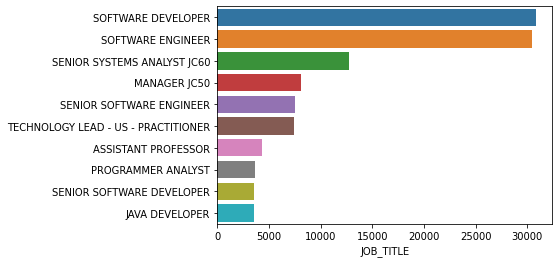

In [75]:
dataset['JOB_TITLE'].value_counts()
sns.barplot(x = dataset['JOB_TITLE'].value_counts()[:10], y = dataset['JOB_TITLE'].value_counts().index[:10])

In [76]:
dataset['JOB_TITLE'].nunique()

100816

<AxesSubplot:xlabel='SOC_TITLE'>

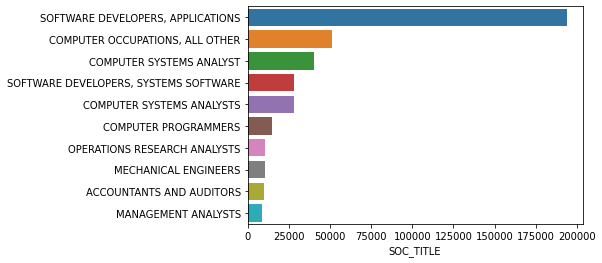

In [77]:
dataset['SOC_TITLE'].value_counts()
sns.barplot(x = dataset['SOC_TITLE'].value_counts()[:10], y = dataset['SOC_TITLE'].value_counts().index[:10])

<AxesSubplot:xlabel='SOC_CODE'>

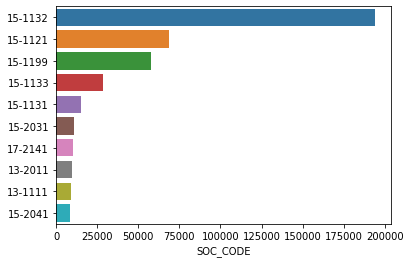

In [78]:
dataset['SOC_CODE'].value_counts()
sns.barplot(x = dataset['SOC_CODE'].value_counts()[:10], y = dataset['SOC_CODE'].value_counts().index[:10])

In [79]:
dataset['NAICS_CODE'].value_counts()


541511.0    189010
541512.0     60686
611310.0     20939
5416.0       18460
54151.0      14299
             ...  
453991.0         1
33791.0          1
56299.0          1
44521.0          1
445230.0         1
Name: NAICS_CODE, Length: 1936, dtype: int64

In [80]:
dataset['NAICS_CODE'].nunique()

1936

In [81]:
dataset['SOC_CODE'].nunique()

502

In [84]:
#dataset['JOB_TITLE'] = dataset['JOB_TITLE'].str.replace("%" , "").astype(float)
#dataset.loc[dataset['JOB_TITLE']=='ADVERSTING AND PROMOTIONS MANAGER']

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,H-1B,FANTUAN GROUP INC,0,1,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,...,0.0,0,0,1,0,1,33.0,1,1.0,83337.328527


In [93]:
CrosstabResult=pd.crosstab(index=dataset['JOB_TITLE'],columns=dataset['CASE_STATUS'])

In [94]:
CrosstabResult

CASE_STATUS,CERTIFIED,DENIED
JOB_TITLE,,
&NBSP;IT SPECIALIST,2,0
&NBSP;SVC INFO DEVELOPER,1,0
&NBSP;VALIDATION ENGINEER,1,0
(ANALYST,1,0
(INFORMATION TECHNOLOGY) BUSINESS MANAGER,1,0
...,...,...
YOUTH TRAINING DIRECTOR,1,0
ZIP ANALYST,1,0
ZOLTNERS PROFESSOR OF EXCELLENCE,1,0


In [95]:
from scipy.stats import chi2_contingency

In [96]:
ChiSqResult = chi2_contingency(CrosstabResult)

In [97]:
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 3.729405338998956e-160


# using label encoding to convert string data points of a variable into numeric data 

In [131]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(dataset['CASE_STATUS'])
label

array([0, 0, 0, ..., 1, 0, 0])

In [132]:
dataset.drop("CASE_STATUS", axis=1, inplace=True)
dataset["CASE_STATUS"] = label
dataset["CASE_STATUS"].head(30)

24     0
26     0
47     0
52     0
54     0
55     0
56     0
57     0
72     0
73     0
75     0
79     0
84     0
87     0
88     0
90     1
93     0
94     0
96     0
97     0
106    0
107    0
111    0
120    0
121    0
122    0
128    0
130    0
131    0
132    0
Name: CASE_STATUS, dtype: int32

In [133]:
label1 = le.fit_transform(dataset['EMPLOYER_NAME']) 
dataset.drop("EMPLOYER_NAME", axis=1, inplace=True)
dataset["EMPLOYER_NAME"] = label1
dataset["EMPLOYER_NAME"].head(20)

24    19823
26    56412
47    58145
52    62363
54     4178
55     4178
56     4178
57    22470
72     4178
73    53579
75    43808
79    19659
84    52993
87    14095
88    27250
90    36395
93    36395
94    30854
96    48720
97    47293
Name: EMPLOYER_NAME, dtype: int32

In [137]:
dataset.head()
    

,VISA_CLASS,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,...,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,CASE_STATUS,EMPLOYER_NAME
24,H-1B,Y,1,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,0,0.0,...,0,1,0,N,33.0,Hour,1.0,83337.328527,0,19823
26,H-1B,Y,1,ADVERTISING AND PROMOTIONS DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,56142.0,0,0,0.0,...,0,1,0,N,99000.0,Year,1.0,83337.328527,0,56412
47,H-1B,N,1,PROGRAM MANAGER I,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,611310.0,0,0,0.0,...,0,1,0,N,67500.0,Year,1.0,55370.000000,0,58145
52,H-1B,Y,1,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,0,0.0,...,0,1,0,N,102000.0,Year,1.0,94806.000000,0,62363
54,H-1B,Y,1,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,0,0.0,...,0,1,0,N,97781.0,Year,50.0,97781.000000,0,4178


In [134]:
dataset.corr()

,SECONDARY_ENTITY_1,NAICS_CODE,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WAGE_RATE_OF_PAY_FROM_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1,CASE_STATUS,EMPLOYER_NAME
SECONDARY_ENTITY_1,1.000000,-0.113163,0.029693,-0.000858,0.077182,0.002661,0.595411,-0.028443,0.195372,0.056214,0.086495,0.041544,-0.010720
NAICS_CODE,-0.113163,1.000000,-0.031092,-0.039867,-0.099807,-0.120598,-0.203151,0.021160,-0.011359,-0.107975,-0.050524,-0.018541,0.131916
CHANGE_PREVIOUS_EMPLOYMENT,0.029693,-0.031092,1.000000,0.302500,0.412826,0.519097,-0.020126,-0.004440,0.016783,0.503079,0.041264,0.009475,0.012903
NEW_CONCURRENT_EMPLOYMENT,-0.000858,-0.039867,0.302500,1.000000,0.236781,0.296903,0.017904,-0.002464,-0.042428,0.376653,-0.028657,0.003067,0.002109
CHANGE_EMPLOYER,0.077182,-0.099807,0.412826,0.236781,1.000000,0.524294,0.064370,-0.007976,0.072402,0.571665,0.101755,-0.002060,-0.027640
AMENDED_PETITION,0.002661,-0.120598,0.519097,0.296903,0.524294,1.000000,-0.010339,0.002116,0.020818,0.599845,0.056898,-0.002530,-0.021796
H-1B_DEPENDENT,0.595411,-0.203151,-0.020126,0.017904,0.064370,-0.010339,1.000000,-0.068507,0.159061,0.039438,0.040725,0.042183,-0.017642
SUPPORT_H1B,-0.028443,0.021160,-0.004440,-0.002464,-0.007976,0.002116,-0.068507,1.000000,-0.036557,0.000098,-0.024515,0.001494,0.009985
WAGE_RATE_OF_PAY_FROM_1,0.195372,-0.011359,0.016783,-0.042428,0.072402,0.020818,0.159061,-0.036557,1.000000,0.011258,0.754716,-0.022170,-0.028326
TOTAL_WORKER_POSITIONS,0.056214,-0.107975,0.503079,0.376653,0.571665,0.599845,0.039438,0.000098,0.011258,1.000000,0.044390,0.004550,-0.023566


<AxesSubplot:>

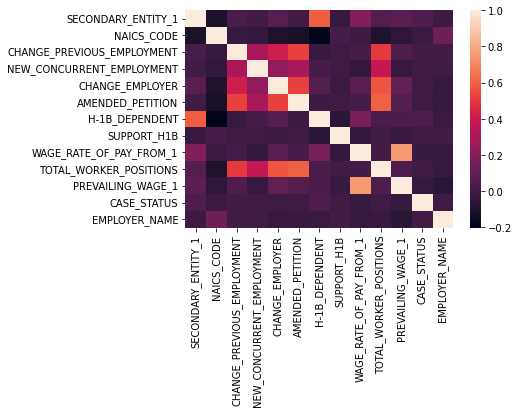

In [136]:
sns.heatmap(dataset.corr())